# Linear Regression with Numpy

In [4]:
import pandas as pd
import numpy as np

class LinearRegression():

    def __init__(self, intercept=True):
        # TODO: Store intercept as attribute
        self.intercept = intercept

    def fit(self, X, y):
        # TODO: Compute and store estimated betas using matrix operations
        if self.intercept:
            X = np.hstack((np.ones((X.shape[0], 1)), X))

        self.beta = np.linalg.inv(X.T @ X) @ X.T @ y
        self.intercept_ = self.beta[0]
        self.coef_ = self.beta[1:]

    def predict(self, X):
        # TODO: Predict y for given X
        if self.intercept:
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X @ self.beta

In [5]:
# Test code
br = pd.read_csv('data/BatonRouge.csv')

# Make sure you check the size of X, y below 
# and understand how X, y are used in the class
X = br[['SQFT', 'Bedrooms', 'Baths', 'Age']].to_numpy().reshape(-1, 4) # ? rows, 4 columns
y = br['Price'].to_numpy()

model = LinearRegression()
model.fit(X, y)

print(model.beta)
print(model.predict(X[0,:].reshape(1,-1)))

# print(model.coef_)
# print(model.intercept_)

[-26733.12387717     87.50068839 -29192.65362542  41420.76777941
   -553.40329029]
[40371.74115194]


# Linear Regression with sklearn

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv('data/auction.txt', delimiter='\t')
df.head()

,Age,Bidders,Price
0,127,13,1235
1,115,12,1080
2,127,7,845
3,150,9,1522
4,156,6,1047


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Age      32 non-null     int64
 1   Bidders  32 non-null     int64
 2   Price    32 non-null     int64
dtypes: int64(3)
memory usage: 896.0 bytes


In [9]:
df.describe()

,Age,Bidders,Price
count,32.000000,32.000000,32.000000
mean,144.937500,9.531250,1327.156250
std,27.395476,2.839632,393.134395
min,108.000000,5.000000,729.000000
25%,117.000000,7.000000,1053.000000
50%,140.000000,9.000000,1257.500000
75%,168.500000,11.250000,1560.750000
max,194.000000,15.000000,2131.000000


In [10]:
X = df[['Age', 'Bidders']].to_numpy().reshape(-1, 2)
y = df['Price'].to_numpy()

In [11]:
model = LinearRegression(fit_intercept=True)
lr_obj = model.fit(X, y)

In [12]:
lr_obj.intercept_

-1336.7220521429554

In [13]:
lr_obj.coef_

array([12.73619884, 85.8151326 ])

In [14]:
new_clock = np.array([121, 15]).reshape(1,2)
predicted_price = lr_obj.predict(new_clock)
print("Estimated Sale Price: ${0:.2f}".format(predicted_price[0]))

Estimated Sale Price: $1491.58


# Linear Regression with Gradient Descent and Numpy

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def Gradient_Descent_LinearReg(X, y, beta, alpha, numIterations):
    """
    Inputs:
        X: 2d-array with shape (num_samples, num_features)
        y: 2d-array with shape (num_samples, 1)
        beta: initial value of beta with shape (num_features, 1)
        alpha: learning rate
        numIterations: max number of iterations of running GD
    """
    
    N = X.shape[0]
    d = X.shape[1]
    xTrans = X.T
    
    # create some placeholders for loss and betas
    loss_total = np.zeros((numIterations,1))
    beta_all = np.zeros((numIterations,d))
    
    for i in range(numIterations):
        
        # predicted values from the model
        model_0 = np.matmul(X, beta)
        loss_temp = model_0 - y
        
        # calculte the loss function
        loss = np.sum(np.square(loss_temp)) / (2 * N)
        # save all the loss function values at each step
        loss_total[i]= loss
        #You can check iteration by
        #print("Iteration: {0} | Loss fucntion: {1}".format(i, loss))
        
        # calcualte the gradient using matrix representation
        gradient = ( xTrans @ (X @ beta - y) ) / N
        # gradient = ( xTrans @ loss_temp ) / N

        # update the parameters simulteneously with learning rate alpha
        beta = beta - alpha * gradient
        
        # save all the estimated parametes at each step
        beta_all[i,:]= beta.T
        
    return beta, beta_all, loss_total

In [17]:
# Initialise RNG to generate the same random numbers each time
np.random.seed(0)

#number of training examples
N = 50 
x = np.linspace(0.0, 1.0, N)
# Function true coefficients/parameters
beta0 = 4
beta1 = 1.5

# true values from linear model
f = beta0 + beta1 * x 
y = f + np.random.normal(0, 0.1, N)

# reshape into (N,1) and add column ones
y = y.reshape((len(y), 1)) 
x = x.reshape((len(x), 1))
x = np.hstack((np.ones((len(x),1)), x))

In [18]:
# set parameters
numIterations= 100000
alpha = 0.0005

# parameters starting values
d = x.shape[1]
beta_initial = np.zeros((d,1))

beta, beta_total, loss_total = Gradient_Descent_LinearReg(x, y, beta_initial, alpha, numIterations) # add your code here  
print(beta)

[[4.07326891]
 [1.38001925]]


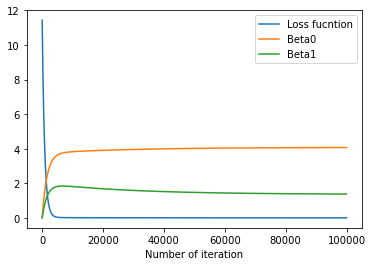

In [19]:
# plot the convergence
plt.figure()
plt.plot(loss_total, label = "Loss fucntion")
plt.plot(beta_total[:,0], label = "Beta0")
plt.plot(beta_total[:,1], label = "Beta1")
plt.legend(loc="upper right")
plt.xlabel("Number of iteration")
plt.show()

# Linear Regression with Gradient Descent and Pytorch

In [22]:
import torch
import numpy as np

# set device (this step is optiional; by default, it will be cpu)
device = torch.device("cpu")
# device = torch.device("cuda:0")  # you can uncomment if you have GPU available

In [23]:
# Initialise RNG to generate the same random numbers each time
np.random.seed(0)
#number of training examples
N = 50 
x = np.linspace(0.0, 1.0, N)
# Function true coefficients/parameters
beta0 = 4
beta1 = 1.5
 
# true values from linear model
f = beta0 + beta1 * x 
y = f + np.random.normal(0, 0.1, N)

# reshape into (N,1) and add column ones
y = y.reshape((len(y), 1)) 
x = x.reshape((len(x), 1))
x = np.hstack((np.ones((len(x),1)), x))

In [24]:
x_torch = torch.from_numpy(x).float().to(device)
y_torch = torch.from_numpy(y).float().to(device)

print(torch.from_numpy(x).type())
print(x_torch.type())

torch.DoubleTensor
torch.FloatTensor


In [25]:
# set random seed for replicability
torch.manual_seed(0)
N, d = x_torch.shape

# initialize beta randomly
# Set requires_grad = True to tell Pytorch that this is a parameter 
# and you need to keep track of its gradient in the computational graph
beta = torch.randn((d, 1), device=device, requires_grad=True)
# set parameters
alpha = 0.0005 
numIterations = 10000 

# some placeholders
loss_total = torch.zeros((numIterations,1))
beta_total = torch.zeros((numIterations,d))

In [26]:
# **define loss function: we use mse loss**
loss_fn = torch.nn.MSELoss(reduction='mean')

# **define optimizer: we use SGD optimizer with parameters set to be beta**
optimizer = torch.optim.SGD([beta], lr=alpha)

In [27]:
for i in range(numIterations):
    # compute prediction and loss by passing in the entire dataset (x_torch, y_torch)
    y_pred = torch.matmul(x_torch, beta)
    loss = loss_fn(y_pred, y_torch)

    # backward pass to compute gradient
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its parameters
    optimizer.step()
    
    # zero out gradients. This is because whenever backwards is called,
    # gradients are accumulated. 
    optimizer.zero_grad()
    
    # == Stats log == 
    # store loss
    loss_total[i] = loss
    # print out loss every 1000 iterations
    if i % 1000 == 0:
        print('Iteration: {}, Loss: {:.2f}'.format(i, loss))
        
    # store betas
    beta_total[i,:] = beta.detach().t()

Iteration: 0, Loss: 11.60
Iteration: 1000, Loss: 0.93
Iteration: 2000, Loss: 0.09
Iteration: 3000, Loss: 0.02
Iteration: 4000, Loss: 0.01
Iteration: 5000, Loss: 0.01
Iteration: 6000, Loss: 0.01
Iteration: 7000, Loss: 0.01
Iteration: 8000, Loss: 0.01
Iteration: 9000, Loss: 0.01


In [28]:
print(beta)

tensor([[4.1450],
        [1.2463]], requires_grad=True)


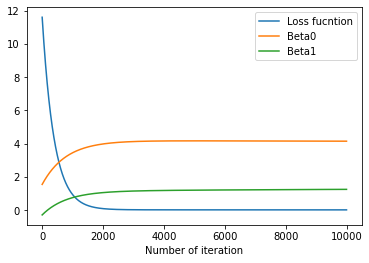

In [29]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(loss_total.detach(), label = "Loss fucntion")
plt.plot(beta_total[:,0], label = "Beta0")
plt.plot(beta_total[:,1], label = "Beta1")
plt.legend(loc="upper right")
plt.xlabel("Number of iteration")
plt.show()

- ## Stochastic gradient descent for large datasets
Normally we will be dealing with large-scale datasets with NN extremely large. In this case, computing the full gradient can be inefficient. You will be implementing stochastic gradient descent (SGD) based optimizers.

In [30]:
# set random seed for replicability
torch.manual_seed(0)

N, d = x_torch.shape

# initialize beta
beta = torch.randn((d, 1), device = device, requires_grad = True)

# set parameters
alpha = 0.0005 
numIterations = 10000 
batchSize = 20 # how many samples we use to compute gradient

# some placeholders
loss_total = torch.zeros((numIterations,1))
beta_total = torch.zeros((numIterations,d))

# **define loss function: we use mse loss**
loss_fn = torch.nn.MSELoss(reduction='mean')

# **define optimizer: we use SGD optimizer with parameters set to be beta**
optimizer = torch.optim.SGD([beta], lr=alpha)


for i in range(numIterations):
    
    # === ONLY DIFFERENCE: Pass in a subset of dataset when N is too large ===
    randomIdx = torch.randint(0, N, (batchSize,)) # random select 20 indices
    x_batch = x_torch[randomIdx]
    y_batch = y_torch[randomIdx]
    
    y_pred = torch.matmul(x_batch, beta)
    loss = loss_fn(y_pred, y_batch)

    # backward pass to compute gradient
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its parameters
    optimizer.step()
    
    # zero out gradients. This is because whenever backwards is called,
    # gradients are accumulated. 
    optimizer.zero_grad()
    
    
    # == Stats log == 
    # store loss
    loss_total[i] = loss
    # print out loss every 1000 iterations
    if i % 1000 == 0:
        print('Iteration: {}, Loss: {:.2f}'.format(i, loss))
        
    # store betas
    beta_total[i,:] = beta.detach().t()

Iteration: 0, Loss: 11.41
Iteration: 1000, Loss: 1.08
Iteration: 2000, Loss: 0.10
Iteration: 3000, Loss: 0.01
Iteration: 4000, Loss: 0.01
Iteration: 5000, Loss: 0.01
Iteration: 6000, Loss: 0.01
Iteration: 7000, Loss: 0.02
Iteration: 8000, Loss: 0.01
Iteration: 9000, Loss: 0.01


In [31]:
beta

tensor([[4.1459],
        [1.2465]], requires_grad=True)

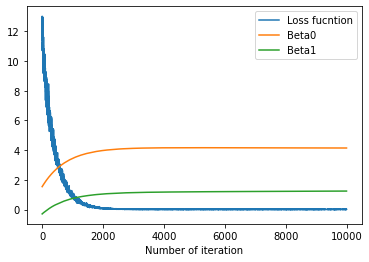

In [32]:
plt.figure()
plt.plot(loss_total.detach(), label = "Loss fucntion")
plt.plot(beta_total[:,0], label = "Beta0")
plt.plot(beta_total[:,1], label = "Beta1")
plt.legend(loc="upper right")
plt.xlabel("Number of iteration")
plt.show()

In [33]:
beta_total[6000, 1] == beta_total[8000, 1]

tensor(False)

In [34]:
beta_total[6000, 1]

tensor(1.2093)

In [35]:
beta_total[8000, 1]

tensor(1.2292)

In [36]:
# It wanders around the True parameter